EX1


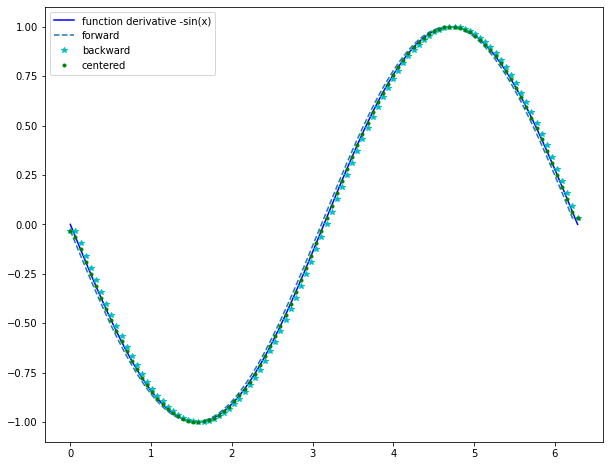

O(h) = 0.06346651825433926 for backward and forward methods
(O(h)^2) = 0.004027998939328379 for central difference methods
     forward  backward   central  delta_for  delta_back  delta_cent
0  -0.031723 -0.031723 -0.031723   0.031723    0.031723    0.031723
1  -0.095040 -0.031723 -0.063381   0.031616   -0.031701   -0.000043
2  -0.157975 -0.095040 -0.126507   0.031382   -0.031552   -0.000085
3  -0.220274 -0.157975 -0.189124   0.031022   -0.031276   -0.000127
4  -0.281685 -0.220274 -0.250979   0.030537   -0.030874   -0.000169
..       ...       ...       ...        ...         ...         ...
95  0.220274  0.281685  0.250979   0.030874   -0.030537    0.000169
96  0.157975  0.220274  0.189124   0.031276   -0.031022    0.000127
97  0.095040  0.157975  0.126507   0.031552   -0.031382    0.000085
98  0.031723  0.095040  0.063381   0.031701   -0.031616    0.000043
99  0.031723  0.031723  0.031723  -0.031723   -0.031723   -0.031723

[100 rows x 6 columns]


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy import optimize
#from scipy.optimize import fsolve
from sympy import *
import sympy as sym
#import math

print('EX1')


def my_der_calc(f, a, b, N, option):
    """
    This ufunc finds a differential solution to given set of points
    using finite difference to approximate the derivatives. Depending
    on the option entered it will use forward backward and central
    difference methods. At the central difference the begaining and
    ending were approximated with forward and backward difference.
    """
    if N < 10:
        print('N must be greater than 10 (N > 10)')
        N = 10
    else:
        N = N
    # create the data in even increments       
    x = np.linspace(a, b, N)
    y = f(x)
    
    
    if option == 'forward':
        """forward difference"""
        dyf = [0.0]*len(x)
        for i in range(len(y)-1):
            dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
        #set last element by backwards difference
        dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
        return dyf
    
    elif option == 'backward':
        """and now a backwards difference"""
        dyb = [0.0]*len(x)
        #set first element by forward difference
        dyb[0] = (y[0] - y[1])/(x[0] - x[1])
        for i in range(1,len(y)):
            dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])
        return dyb
    
    elif option == 'central':
        '''and now, a centered formula'''
        dyc = [0.0]*len(x)
        #set first element by forward difference
        dyc[0] = (y[0] - y[1])/(x[0] - x[1])
        for i in range(1,len(y)-1):
            dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
        #set last element by backwards difference
        dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
        return dyc

x = Symbol('x')  # sympy symbol
f = sym.cos(x)  # analytical function 

a = 0
b = 2*np.pi
N = 100
fs = f  # algebric equation for display
dfdx = f.diff(x)  # first order deritive)
f = lambdify(x, f)  # sympy as lambda f(x)
df = lambdify(x, dfdx)

x = np.linspace(a, b, N)
df = df(x)

#  All three methods
dyf = my_der_calc(f, a, b, N, 'forward')
dyb = my_der_calc(f, a, b, N, 'backward')
dyc = my_der_calc(f, a, b, N, 'central')
# dataframe to store the results and calculate error
derv_df = pd.DataFrame(list(zip(x, df, dyf, dyb, dyc)),
                       columns=['x', dfdx, 'forward', 'backward', 'central'])
derv_df['delta_for'] = np.subtract(df,dyf)
derv_df['delta_back'] = np.subtract(df,dyb)
derv_df['delta_cent'] = np.subtract(df,dyc)

# Plots all three on the same plot
plt.figure(figsize=(10, 8))
plt.plot(x,df, 'b-', label=f'function derivative {dfdx}')
plt.plot(x,dyf,'--', label='forward')
plt.plot(x,dyb,'c*', label='backward')
plt.plot(x,dyc,'g.', label='centered')

plt.legend(loc='upper left')
plt.show()
print(f'O(h) = {(x[-1] - x[0]) / (int(x.shape[0]) - 1)} for backward and forward methods\n'
      f'(O(h)^2) = {((x[-1] - x[0]) / (int(x.shape[0]) - 1))**2} for central difference methods')
df_p = derv_df.iloc[:, 2:]
print(df_p)

EX2.1
The deritive of sin(x) is cos(x)


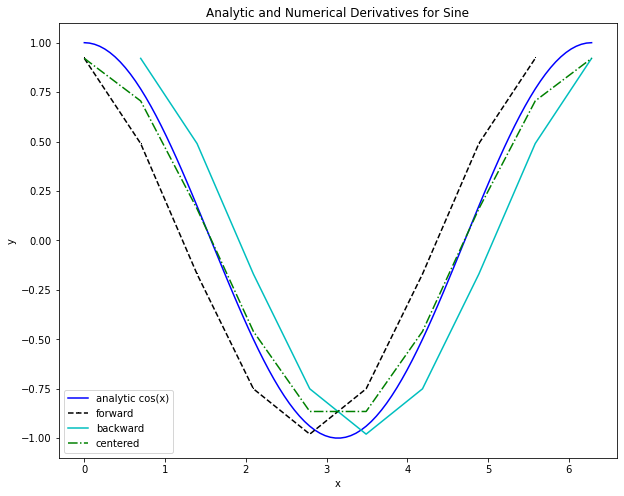

O(h) = 0.6981317007977318 for backward and forward methods
(O(h)^2) = 0.4873878716587337 for central difference methods
          x    cos(x)        xf   forward        xb  backward        xc  \
0  0.000000  1.000000  0.000000  0.920725  0.698132  0.920725  0.000000   
1  0.698132  0.766044  0.698132  0.489908  1.396263  0.489908  0.698132   
2  1.396263  0.173648  1.396263 -0.170143  2.094395 -0.170143  1.396263   
3  2.094395 -0.500000  2.094395 -0.750582  2.792527 -0.750582  2.094395   
4  2.792527 -0.939693  2.792527 -0.979816  3.490659 -0.979816  2.792527   
5  3.490659 -0.939693  3.490659 -0.750582  4.188790 -0.750582  3.490659   
6  4.188790 -0.500000  4.188790 -0.170143  4.886922 -0.170143  4.188790   
7  4.886922  0.173648  4.886922  0.489908  5.585054  0.489908  4.886922   
8  5.585054  0.766044  5.585054  0.920725  6.283185  0.920725  5.585054   

    central  
0  0.920725  
1  0.705317  
2  0.159882  
3 -0.460363  
4 -0.865199  
5 -0.865199  
6 -0.460363  
7  0.159882  
8  

In [45]:
print('EX2.1')

def my_der_calc(f, a, b, n, option):
    """
    lets use a forward difference method:
    that works up until the last point, where there is not
    a forward difference to use. there, we use a backward difference.
    """
    if n < 10:
        print('N must be greater than 10 (N > 10)')
        n = 10
    else:
        n = n
    
    if option == 'forward':
        xf = np.linspace(a, b, n)
        y = f(xf)
        """forward difference"""
        dyf = [0.0]*(len(xf))
        for i in range(len(y)-1):
            dyf[i] = (y[i+1] - y[i])/(xf[i+1]-xf[i])
        # set last element by backwards difference
        # dyf[-1] = (y[-1] - y[-2])/(xf[-1] - xf[-2])
        dyf = np.delete(dyf, [-1])
        xf = np.delete(xf, [-1])
        return dyf, xf
    
    elif option == 'backward':
        xb = np.linspace(a, b, n)
        y = f(xb)
        """and now a backwards difference"""
        dyb = [0.0]*(len(xb))
        # set first element by forward difference
        # dyb[0] = (y[0] - y[1])/(xb[0] - xb[1])
        for i in range(len(y)):
            dyb[i] = (y[i] - y[i-1])/(xb[i]-xb[i-1])
        dyb = np.delete(dyb, [0])
        xb = np.delete(xb, [0])
        return dyb, xb
    
    elif option == 'central':
        xc = np.linspace(a, b, n)
        y = (f(xc))
        '''and now, a centered formula'''
        dyc = [0.0]*(len(xc))
        dyc[0] = (y[1] - y[0])/(xc[1] - xc[0])  # end point
        for i in range(1, len(y)-1):
            dyc[i] = (y[i+1] - y[i-1])/(xc[i+1] - xc[i-1])
        dyc[-1] = (y[-2] - y[-1])/(xc[-2] - xc[-1])  # end point
        
        return dyc, xc

x = Symbol('x')
f = sym.sin(x)

a = 0
b = 2*np.pi
N = 100
fs = f
dfdx = f.diff(x) # first order deritive)
print(f'The deritive of sin(x) is {dfdx}')
f = lambdify(x, f)
df = lambdify(x, dfdx)

x = np.linspace(a, b, N)
df = df(x)
x1 = np.linspace(a, b, 10)

df1 = np.cos(x1)

dyf, xf = my_der_calc(f, a, b, 10, 'forward')
dyb, xb = my_der_calc(f, a, b, 10, 'backward')
dyc, xc = my_der_calc(f, a, b, 10, 'central')

derv_df = pd.DataFrame(list(zip(x1, df1, xf, dyf, xb, dyb, xc, dyc)),
                       columns=['x', dfdx, 'xf', 'forward', 'xb', 'backward', 'xc', 'central'])

plt.figure(figsize=(10, 8))
plt.plot(x,df, 'b-', label=f'analytic {dfdx}')
plt.plot(xf,dyf,'k,--', label='forward')
plt.plot(xb,dyb,'c', label='backward')
plt.plot(xc,dyc,'g-.', label='centered')
plt.title('Analytic and Numerical Derivatives for Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')
plt.show()
print(f'O(h) = {(xf[-1] - xf[0]) / (int(xf.shape[0]) - 1)} for backward and forward methods\n'
      f'(O(h)^2) = {((xc[-1] - xc[0]) / (int(xc.shape[0]) - 1))**2} for central difference methods')
df_p = derv_df.iloc[:, :]
print(df_p)

EX2.2
The derivative of sin(exp(x)) is exp(x)*cos(exp(x))


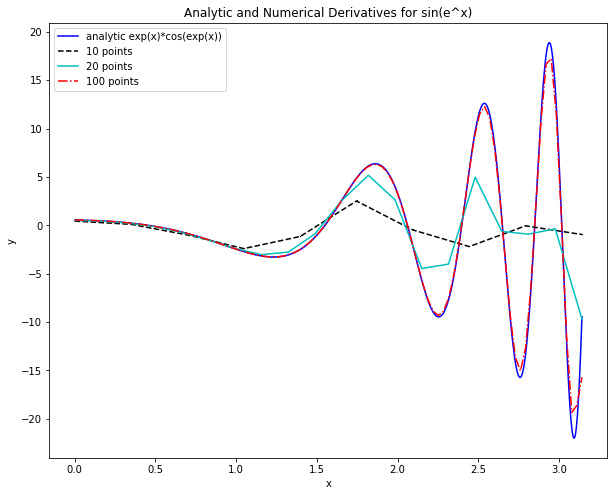

          x  exp(x)*cos(exp(x))  10 points
0  0.000000            0.216145   0.420663
1  0.349066           -0.854676   0.091132
2  0.698132           -2.729078  -1.003393
3  1.047198           -2.516149  -2.417132
4  1.396263            4.866846  -1.167532
5  1.745329           -2.138953   2.502493
6  2.094395            5.692922  -0.489742
7  2.443461          -13.338631  -2.207363

           x  exp(x)*cos(exp(x))  20 points
0   0.000000            0.449632   0.502336
1   0.165347            0.247640   0.431141
2   0.330694           -0.117171   0.220508
3   0.496041           -0.694627  -0.152785
4   0.661388           -1.498719  -0.732970
5   0.826735           -2.434490  -1.521920
6   0.992082           -3.179178  -2.404644
7   1.157429           -3.072004  -3.038849
8   1.322776           -1.239294  -2.781761
9   1.488123            2.563020  -0.897298
10  1.653470            6.121237   2.545263
11  1.818817            3.991952   5.162877
12  1.984164           -5.700907   2.617

In [46]:
print('EX2.2')

x = Symbol('x')
f = sym.sin((sym.exp(x)))

a = 0
b = np.pi
N = 1000
fs = f
dfdx = f.diff(x) # first order deritive)
print(f'The derivative of sin(exp(x)) is {dfdx}')
f = lambdify(x, f)
df = lambdify(x, dfdx)

x = np.linspace(a, b, N)

df = df(x)


[dy10, x10] = my_der_calc(f, a, b, 10, 'central')
[dy20, x20] = my_der_calc(f, a, b, 20, 'central')
[dy100, x100] = my_der_calc(f, a, b, 100, 'central')

x1 = np.linspace(a, b, 10)
x1 = np.delete(x1, [0,-1])
df1 = np.exp(x1)*np.cos(np.exp(x1))
x2 = np.linspace(a, b, 20)
x2 = np.delete(x2, [0,-1])
df2 = np.exp(x2)*np.cos(np.exp(x2))
x3 = np.linspace(a, b, 100)
x3 = np.delete(x3, [0,-1])
df3 = np.exp(x3)*np.cos(np.exp(x3))

derv_df_10 = pd.DataFrame(list(zip(x10, df1, dy10)),
                       columns=['x', dfdx, '10 points'])
derv_df_20 = pd.DataFrame(list(zip(x20, df2, dy20)),
                       columns=['x', dfdx, '20 points'])
derv_df_100 = pd.DataFrame(list(zip(x100, df3, dy100)),
                       columns=['x', dfdx, '100 points'])

plt.figure(figsize=(10, 8))
plt.plot(x,df, 'b-', label=f'analytic {dfdx}')
plt.plot(x10,dy10,'k,--', label='10 points')
plt.plot(x20,dy20,'c', label='20 points')
plt.plot(x100,dy100,'r-.', label='100 points')
plt.title('Analytic and Numerical Derivatives for sin(e^x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()
print(derv_df_10, derv_df_20, derv_df_100, sep='\n\n')

EX3


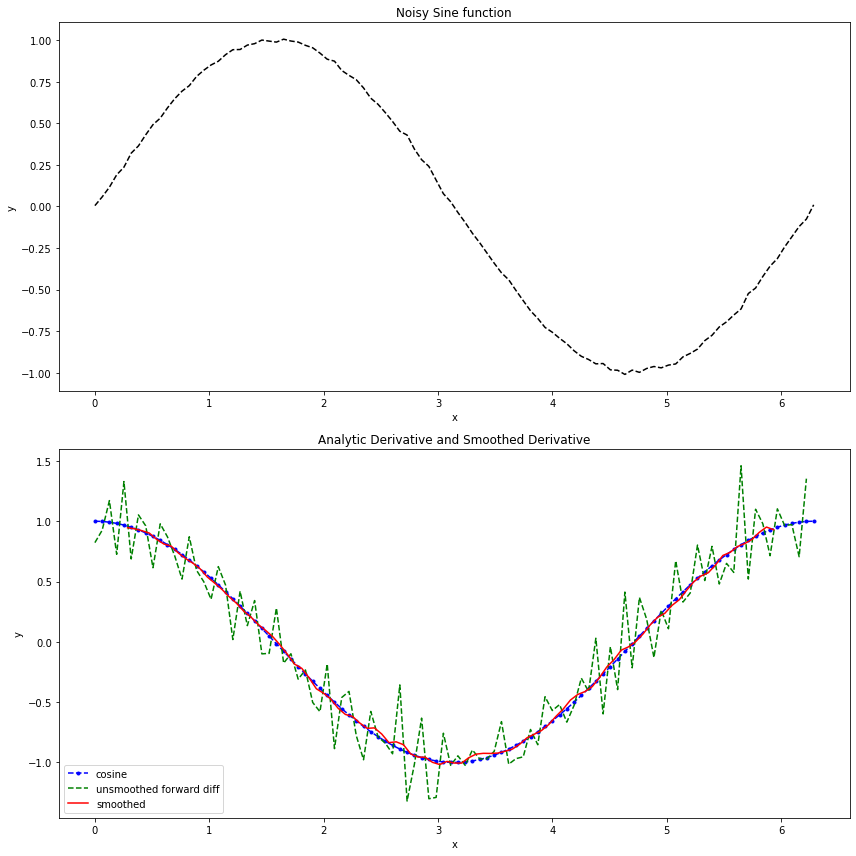

In [47]:
print('EX3')


def my_num_diff_w_smoothing(x, y, n):
    y_smoothed=[]
    x_smoothed = []
    for i in range(n, len(y)-n):
        y_mean = np.mean(y[i-n:i+n])
        y_smoothed.append(y_mean)
        x_mean = np.mean(x[i-n:i+n])
        x_smoothed.append(x_mean)
    y, x = y_smoothed, x_smoothed
    '''and now, a centered formula'''
    dy = [0.0]*(len(x))

    for i in range(1, len(y)-1):
        dy[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
    # Removed the end points for the central diff method.
    dy = np.delete(dy, [0, -1])
    x = np.delete(x, [0, -1])
    return dy, x


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)

plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y, 'k--')
plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(212)
plt.plot(x, np.cos(x), 'b.--', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g--', \
    label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r-', label = 'smoothed')
plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

EX4.1
percent of error: 1.6442% for 50 points between 0 and 2π for divisions of 0.128228
The average difference between actual and estimated 0.010078


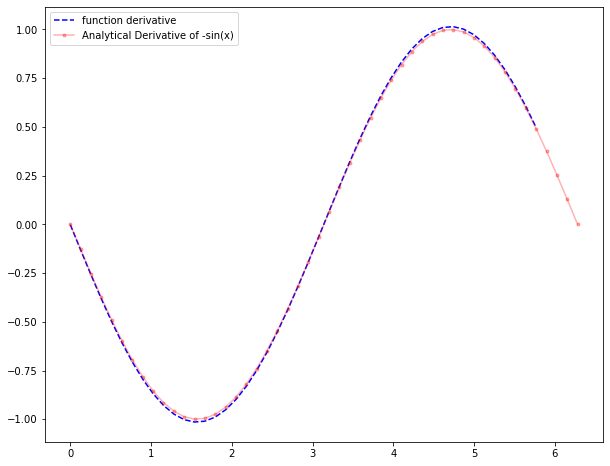

In [48]:
print('EX4.1')


def action(y,x):
    # spacing between points.
    h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    print(f'percent of error: {np.round(h**2*100, 4)}% for 50 points '
          f'between 0 and 2π for divisions of {round(h, 6)}')

    #second derivative using combination slicing
    dy4 = (-y[3:-1] + 4*y[2:-2] - 5*y[1:-3] + 2*y[0:-4])/(h*h)

    return dy4

# x values were separated for analyticly reasons
x = np.linspace(0, 2*np.pi, 50)
xa = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

dya = -np.sin(xa)
dy4 = action(y,x)
print('The average difference between actual and estimated'
      f' {round(np.mean(np.abs(dy4-dya[0:len(x)-4])),6)}')
plt.figure(figsize=(10, 8))
plt.plot(x[0:len(x)-4], dy4, 'b--', label=f'function derivative')
plt.plot(xa, dya, 'r.-', alpha=.3, label='Analytical Derivative of -sin(x)')
plt.legend(loc='upper left')
plt.show()

First Plot Error Order is 1.6442% on 50 points between 0 and 2π for divisions of 0.128228
The average difference between actual and estimated 0.009582


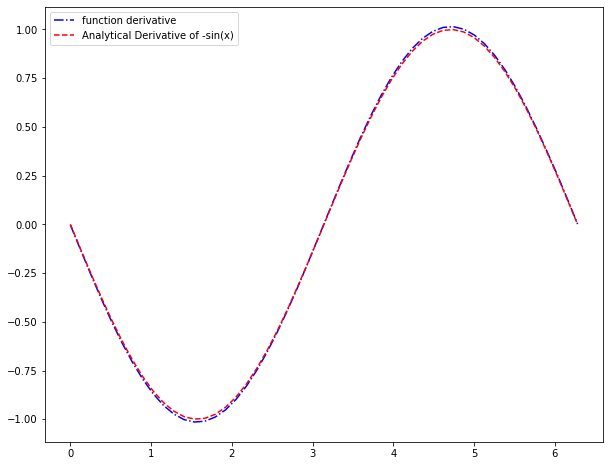

In [49]:


def my_higher_order2(x, y):
    dy = [0.0]*(len(x))
    # to handle the end points for the forward method used
    for i in range(0, 3):
        #dy[i] =  (-y[i+3] + 4*y[i+2] - 5*y[i+1] + 2*y[i])/(x[i+1]-x[i])**2
        dy[i-3] = (-y[i-6] + 4*y[i-5] - 5*y[i-4] + 2*y[i-3])/(x[i+1]-x[i])**2

    for i in range(0, len(y)-3):
        dy[i] = (-y[i+3] + 4*y[i+2] - 5*y[i+1] + 2*y[i])/(x[i+1]-x[i])**2
    return dy


x = np.linspace(0, 2*np.pi, 50)
xa = np.linspace(0, 2*np.pi, 50)

y = np.sin(x)
dya = -np.sin(xa)

h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
Error_order = h**2*100
print(f'First Plot Error Order is {round(Error_order, 4)}% on '
      f'50 points between 0 and 2π for divisions of {round(h, 6)}')

dy = my_higher_order2(x, y)
print(f'The average difference between actual and estimated {round(np.mean(np.abs(dy-dya)),6)}')
plt.figure(figsize=(10, 8))
plt.plot(x,dy, 'b-.', label=f'function derivative')
plt.plot(xa,dya,'r--', label='Analytical Derivative of -sin(x)')
plt.legend(loc='upper left')
plt.show()


EX4.2
percent of error: 2.1014% for 300 points between 0 and 2π for divisions of 0.021014
The average difference between actual and estimated 0.020261


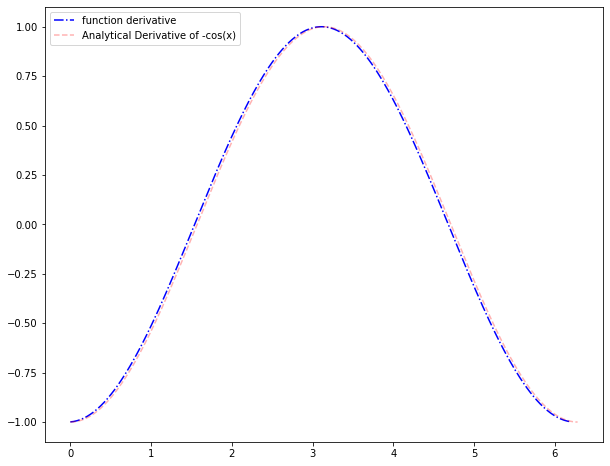

In [50]:
print('EX4.2')


def action2(y,x):
    # spacing between points.
    h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    print(f'percent of error: {np.round(h*100, 4)}% for 300 points '
          f'between 0 and 2π for divisions of {round(h, 6)}')
    # third derivative using combined slicing
    dy4 = (y[3:-1] - 3*y[2:-2] + 3*y[1:-3] - y[0:-4])/(h*h*h)
    
    return dy4

x = np.linspace(0, 2*np.pi, 300)
xa = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)

dya = -np.cos(xa)
dy4 = action2(y,x)
print('The average difference between actual and estimated'
      f' {round(np.mean(np.abs(dy4-dya[0:len(x)-4])),6)}')
plt.figure(figsize=(10, 8))
plt.plot(x[0:len(x)-4], dy4, 'b-.', label=f'function derivative')
plt.plot(xa, dya, 'r--', alpha=.3, label='Analytical Derivative of -cos(x)')
plt.legend(loc='upper left')
plt.show()

Second Plot Error Order is 2.1014% on 300 points between 0 and 2π for divisions of 0.021014
The average difference between actual and estimated 0.020008


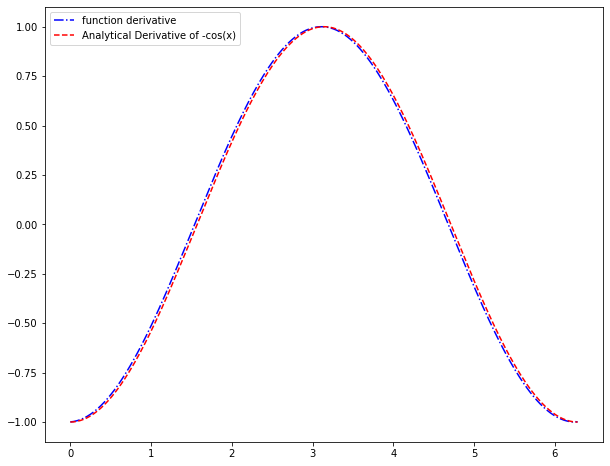

In [51]:
def my_higher_order3(x, y):
    dy = [0.0]*(len(x))
    for i in range(0, 3):
        dy[i] =  (y[i+3] - 3*y[i+2] + 3*y[i+1] - y[i])/(x[i+1]-x[i])**3
        dy[i-3] = (y[i-3] - 3*y[i-4] + 3*y[i-5] - y[i-6])/(x[i+1]-x[i])**3
      
    for i in range(3, len(y)-3):
        dy[i] = (y[i+3] - 3*y[i+2] + 3*y[i+1] - y[i])/(x[i+1]-x[i])**3
        
    
    return dy

x = np.linspace(0, 2*np.pi, 300)
xa = np.linspace(0, 2*np.pi, 300)

y = np.sin(x)
dya = -np.cos(xa)

h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
Error_order = h*100
print(f'Second Plot Error Order is {round(Error_order, 4)}% on '
      f'300 points between 0 and 2π for divisions of {round(h, 6)}')

dy = my_higher_order3(x, y)
print(f'The average difference between actual and estimated {round(np.mean(np.abs(dy-dya)),6)}')
plt.figure(figsize=(10, 8))
plt.plot(x,dy, 'b-.', label=f'function derivative')
plt.plot(xa,dya,'r--', label='Analytical Derivative of -cos(x)')
plt.legend(loc='upper left')
plt.show()
